In [1]:
import pandas as pd
import math
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
logins = pd.read_json("logins.json")
logins.index = pd.DatetimeIndex(logins.login_time)
logins.head()

,login_time
login_time,
1970-01-01 20:13:18,1970-01-01 20:13:18
1970-01-01 20:16:10,1970-01-01 20:16:10
1970-01-01 20:16:37,1970-01-01 20:16:37
1970-01-01 20:16:36,1970-01-01 20:16:36
1970-01-01 20:26:21,1970-01-01 20:26:21


## Part 1. Exploratory Data Analysis
    a. Summary Stats

In [3]:
plt.style.use("seaborn")

In [4]:
logins_resampled = logins.resample("15T").count()
logins_resampled.describe()

,login_time
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


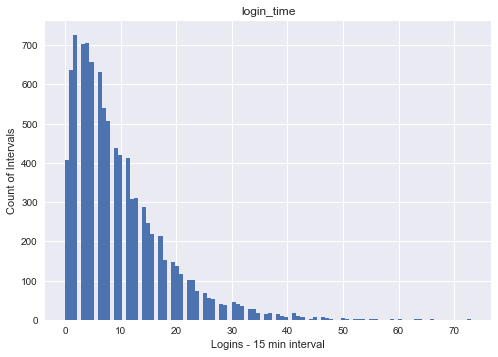

In [5]:
logins_resampled.hist(bins=100,)
plt.xlabel('Logins - 15 min interval')
plt.ylabel('Count of Intervals')
plt.show()

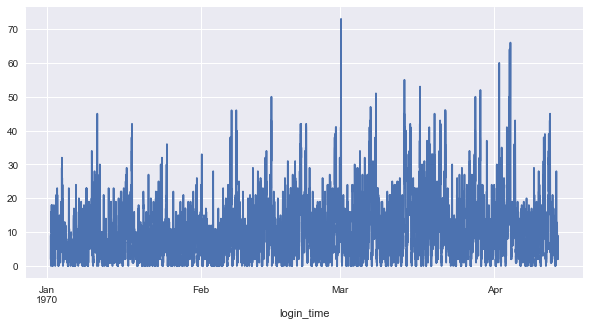

In [6]:
logins_resampled.plot(figsize=[10,5],legend="N. Logins")
plt.legend().remove()
plt.show()

At first glance, logins appear to be cyclical over times of day or days of week

### b. Logins by Hour of Day

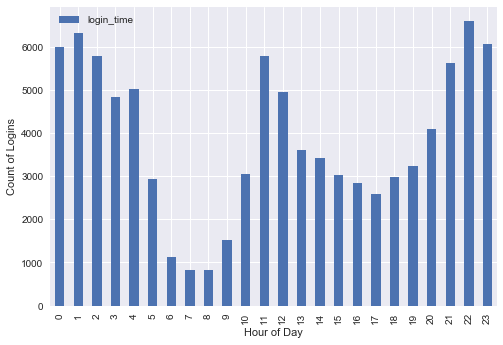

In [7]:
logins_by_hour = logins
logins_by_hour['Hour of Day'] = logins.index.hour
logins_by_hour = logins_by_hour.groupby("Hour of Day").count()
#logins_by_hour.drop("login_time",inplace=True,axis=1)
logins_by_hour.rename(columns={"Day":"Count of Logins"})
logins_by_hour.plot.bar()
plt.ylabel("Count of Logins")
plt.show()

Logins are concentrated around midmorning to lunchtime, and nighttime from about 8pm to 5am

### c. Logins by Day of Week

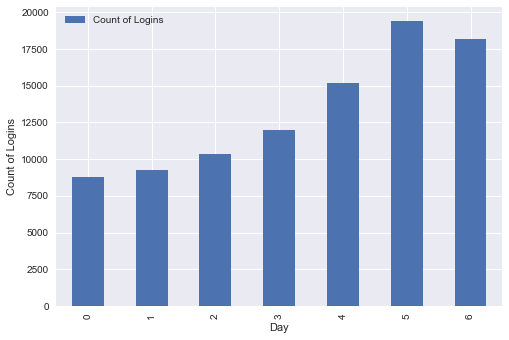

In [8]:
logins_by_day = logins
logins_by_day["Day"] = logins.index.dayofweek
logins_by_day = logins_by_day[['Day','login_time']].rename(columns={"login_time":"Count of Logins"})
logins_by_day = logins_by_day.groupby("Day").count()
logins_by_day.plot.bar()
plt.ylabel("Count of Logins")
plt.show()

Login volume is highest on Friday and Saturday, and during standard non-work hours. It appears that overall logins follow an exponential distribution.

## Part 2 - Experiment Design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.<br><br>

<b>1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?</b>

<i>A good metric to begin with would be the percentage of drivers from each city who complete at least one ride that begins in the other city. This would be an easy way to begin measuring initial success of the experiment, and could be built upon/modified to get even more information.</i><br><br>
 
<b>2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.</b>

<i>Two equally-sized groups of randomly selected drivers should be selected, one as an experimental group and the other as a control. The experimental group would receive reimbursements for their toll costs, while the control group would operate under the same policices and procedures of before. The experiment should run for enough time to capture cyclical fluctuations in logins (Minimum of one week), although the longer the experiment runs the more confidence we can have in the results.<br>
The results could be measured using hypothesis testing principles, by setting up a null hypothesis that the new policy had no statistically significant affect on the number of drivers completing trips that started in the other city, and the alternate hypothesis being that there is a statistically difference. A t test could be used to test the statistical significance of the difference of the metric means of the two groups.<br><br>
    
Statistical significance at a given p-value can help determine what effect the program is having, but it is important to note that statistical significance is not practical significance. Stakeholders should determine whether the the new policy is financially sustainable, makes good business sense for them, and helps them reach their goals (profit, growth, user retention, etc.). The amount of data collected would also impact whatever conclusions are drawn. The results of a year-long experiment involving thousands of drivers will be more reliable than a one month study on only a few dozen. 



In [9]:
with open('ultimate_data_challenge.json') as f:
    json_file = json.load(f)
raw_df = pd.DataFrame(json_file)
raw_df.signup_date = pd.to_datetime(raw_df.signup_date)
raw_df.last_trip_date = pd.to_datetime(raw_df.last_trip_date)
raw_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [10]:
raw_df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [11]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


Missing data in avg_rating_by_driver, avg_rating_of_driver, & phone.

### Scatterplots & Histograms of continuous variables vs. trips in 30 days

In [12]:
numeric = ['float64',"int64"]
continuous = [col for col in raw_df.columns if (raw_df[col].dtype in numeric)]

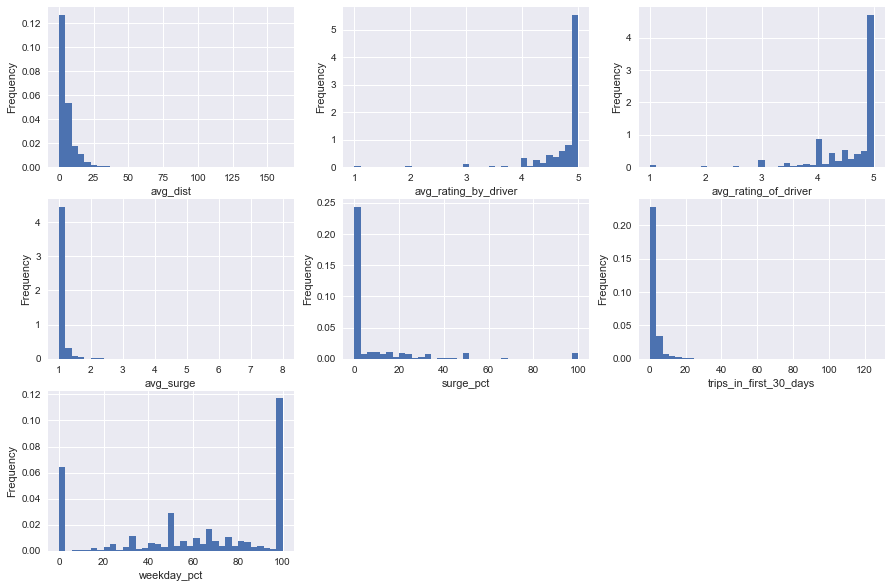

In [13]:
import math

plot_no = 1
plt.figure(figsize=[15,10])

for col in continuous:
    plt.subplot(3,3,plot_no)
    raw_df[col].plot.hist(bins=35,normed=True)
    plt.xlabel(col)
    plot_no +=1
plt.show()

### Plots of Categorical Variables

In [14]:
datetimes = ["last_trip_date",'signup_date']
categorical = [col for col in raw_df.columns if (raw_df[col].dtype not in numeric) & (col not in datetimes)]
len(categorical)

3

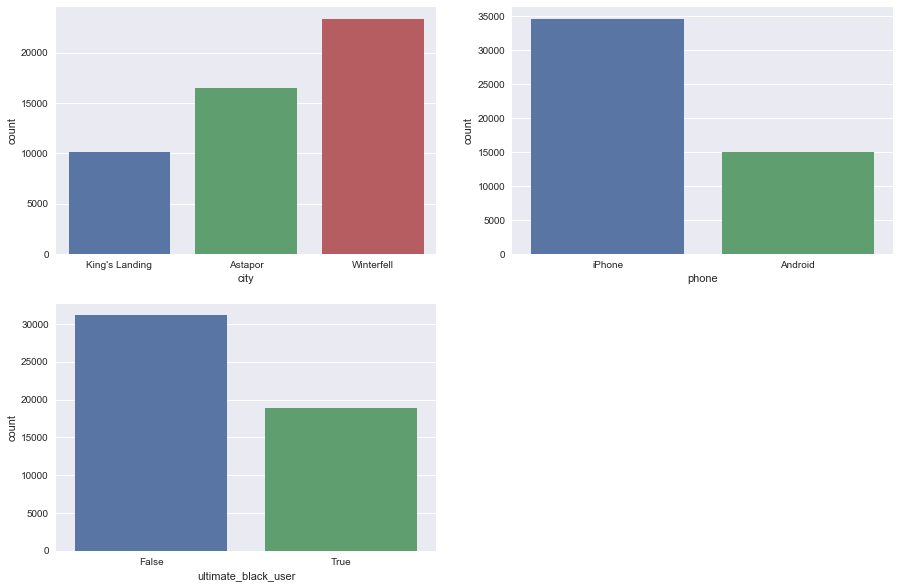

In [15]:
plot_no = 1
plt.figure(figsize=[15,10])
for col in categorical:
    plt.subplot(2,2,plot_no)
    sns.countplot(raw_df[col])
    plt.xlabel(col)
    plot_no +=1

In [16]:
def fillnan(input_df):
    input_df['avg_rating_of_driver'].fillna(input_df['avg_rating_of_driver'].mean(),inplace=True)
    input_df['avg_rating_by_driver'].fillna(input_df['avg_rating_by_driver'].mean(),inplace=True)
    return input_df

def feature_engineering(input_df):
    input_df['6_mo_active'] = np.where(input_df['last_trip_date']>= datetime.datetime(year=2014,month=5,day=14), 1, 0)
    return input_df

In [17]:
df = fillnan(raw_df)
df = feature_engineering(df)

/usr/local/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/usr/local/lib/python3.6/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/usr/local/lib/python3.6/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/usr/local/lib/python3.6/site-packages/statsmodels/nonparametric/_kernel_base.py:514: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
/usr/local/lib/python3.6/site-packages/matplotlib/contour.py:1534: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/usr/local/lib/python3.6/site-packages/matplotlib/contour.py:1535: UserWarning:

AttributeError: 'PairGrid' object has no attribute 'legend'

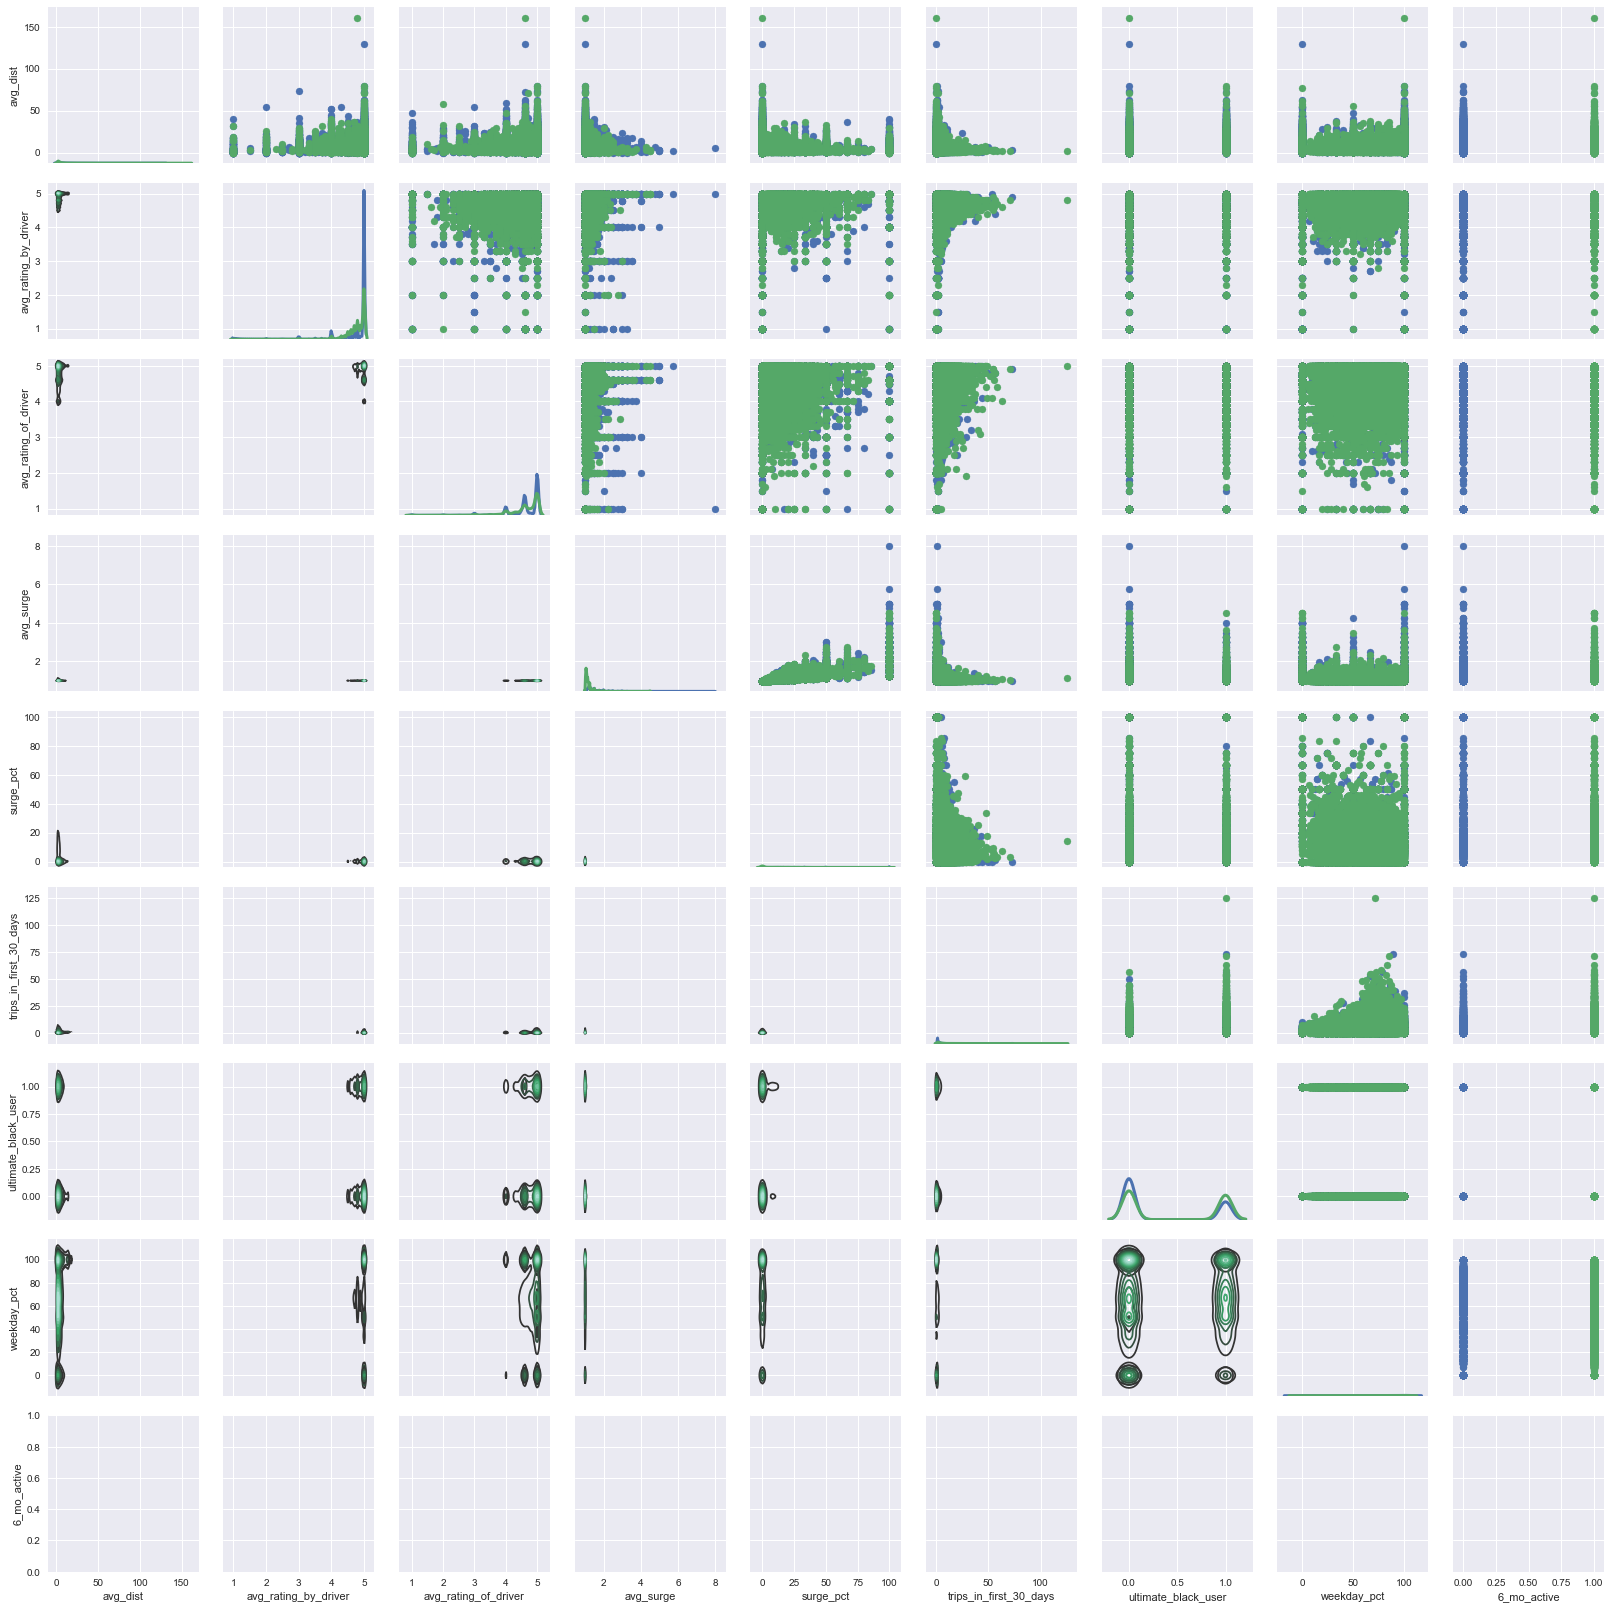

In [18]:
g = sns.PairGrid(df,hue='6_mo_active')
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot)
g = g.map_diag(sns.kdeplot, lw=3)
g.add_legend()
g.get_texts()[0].set_text('Not Active in Past 6 mos')
g.get_texts()[1].set_text('Active in Past 6 mos')
plt.show()

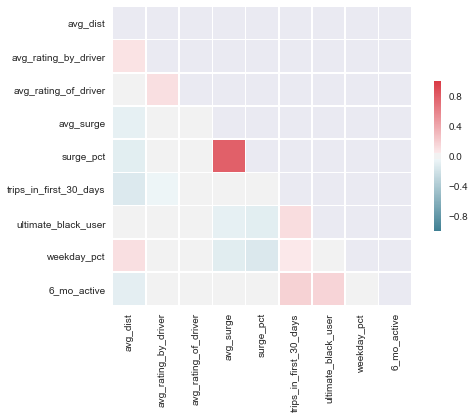

In [19]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1, center=0,vmin=-1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import pipeline
from sklearn.metrics import confusion_matrix
import itertools

In [23]:
# Split into X and y dataframes
X_cols = continuous + categorical
X_cols.remove('avg_surge') ## drop to avoid colinearity
y_cols = ['6_mo_active']
X = df[X_cols]
y = df[y_cols].values
X = pd.get_dummies(data=X,columns=categorical,drop_first=True)

# Split into train and test data, scale
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

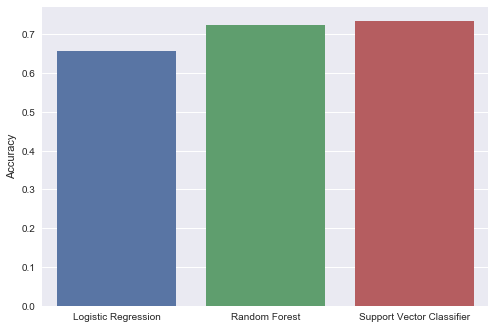

In [24]:
kfold = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

lgr = LogisticRegression(random_state=1)
rfc = RandomForestClassifier(random_state=1)
svc = SVC(random_state=1)
classifiers = [lgr,rfc,svc]
cross_val_results = list()
for classifer in classifiers:
    cross_val_results.append(cross_val_score(classifer,X_train,y_train.ravel(),cv=kfold).mean())
                             
sns.barplot(x=["Logistic Regression","Random Forest","Support Vector Classifier"],y=cross_val_results)
plt.ylabel("Accuracy")
plt.show()

The random forest model achieves the highest cross validation accuracy score.

In [25]:
print("Test Data Score: {}%".format(rfc.fit(X_train,y_train).score(X_test,y_test)*100))

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Test Data Score: 72.7%


Normalized confusion matrix
[[0.76 0.24]
 [0.31 0.69]]


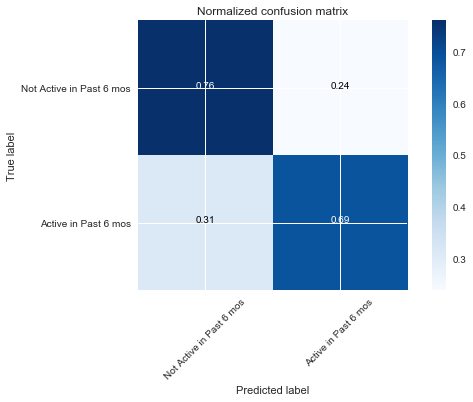

In [26]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = ["Not Active in Past 6 mos",'Active in Past 6 mos']
y_pred = rfc.predict(X_test)
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [27]:
print("Baseline Accuracy: {}%".format(round(y.sum()/len(y)*100,2)))

Baseline Accuracy: 47.62%


Using an off-the-shelf random forest classifier in SciKit, we're able to achieve an accuracy score significantly higher than the baseline, with 72% accuracy. Its possible it could be improved further through more feature engineering, exploration of different classification algorithms, and hyperparameter tuning.<br>
We could also look at metrics such as precision, recall, auc_roc, and F1 to make sure the model isn't overfitting to a particular class and identifying true positives.<br>
The random forest model can help us identify customers that may not be active in 6 months in order to help understand what makes them go inactive, and offer incentives to keep them logging in and using the app. We can also look at a ranking of features determined by the model (See below) in order understand what keeps users active.

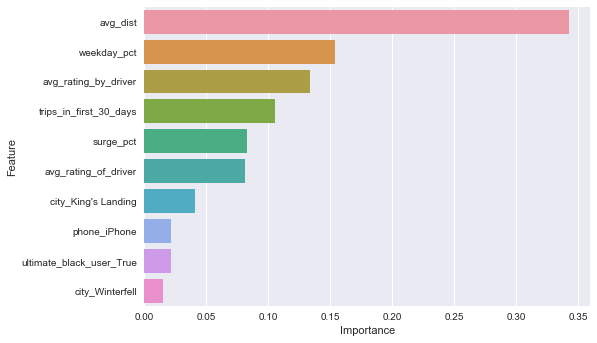

In [35]:
rfc_importance = pd.DataFrame({"Feature" : X.columns, "Importance" : rfc.feature_importances_}).sort_values("Importance",ascending=False)
sns.barplot(y="Feature",x="Importance",data=rfc_importance)
plt.show()